In [93]:
import tensorflow as tf
import pandas as pd
import os

In [94]:
train_path = os.path.join(os.getcwd(),'all/train.csv')
test_path  = os.path.join(os.getcwd(),'all/test.csv')
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

In [95]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [96]:
x_train = train.loc[:,'pixel0':].values.reshape(train.shape[0],1,28,28)\
                    .astype('float32')
y_train = train.loc[:,'label']
x_test  = test.values.reshape(test.shape[0],1,28,28).astype('float32')

In [97]:
x_train.shape

(42000, 1, 28, 28)

0


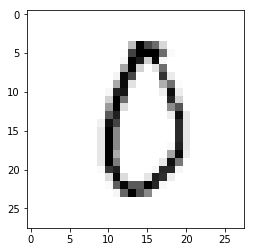

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 69
print(y_train[image_index])
plt.imshow(x_train[image_index,0], cmap='Greys')

In [99]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


In [100]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [119]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(28, kernel_size=(5,5), input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [120]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
42000/42000 [==============================] - 27s 638us/step - loss: 0.2088 - acc: 0.9350
Epoch 2/20
42000/42000 [==============================] - 27s 635us/step - loss: 0.0648 - acc: 0.9800
Epoch 3/20
42000/42000 [==============================] - 27s 639us/step - loss: 0.0437 - acc: 0.9862
Epoch 4/20
42000/42000 [==============================] - 27s 640us/step - loss: 0.0335 - acc: 0.9899
Epoch 5/20
42000/42000 [==============================] - 27s 651us/step - loss: 0.0268 - acc: 0.9918
Epoch 6/20
42000/42000 [==============================] - 28s 662us/step - loss: 0.0222 - acc: 0.9930
Epoch 7/20
42000/42000 [==============================] - 26s 627us/step - loss: 0.0196 - acc: 0.9932
Epoch 8/20
42000/42000 [==============================] - 29s 691us/step - loss: 0.0148 - acc: 0.9952
Epoch 9/20
42000/42000 [==============================] - 26s 612us/step - loss: 0.0144 - acc: 0.9954
Epoch 10/20
42000/42000 [==============================] - 28s 668us/step - loss: 

In [121]:
import numpy as np
test_pred = model.predict(x_test)
test_labels = np.argmax(test_pred, axis=1)

Label Prediction: 5


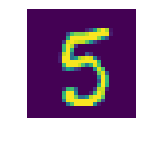

In [122]:
k = 10 # Try different image indices k
print("Label Prediction: %i"%test_labels[k])
fig = plt.figure(figsize=(2,2)); plt.axis('off')
plt.imshow(x_test[k,:,:,0]); plt.show()

In [123]:
submission = pd.DataFrame(data={'ImageId':(np.arange(test_labels.shape[0])+1), 'Label':test_labels})
submission.to_csv('submission_3.csv', index=False)
submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
